 # CS 216 Project Prototype

## Data

In [1]:
import seaborn as sns
if ('0.11' in sns.__version__) or ('0.12' in sns.__version__):
    sns.set_theme()
else:
    sns.set()
# These two lines setup the Seaborn style 
sns.set_theme()
sns.set_context('talk')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pl_winners = pd.read_csv("PL_Winners.csv")
standings = pd.read_csv("1993-2022_Standings.csv")
arsenal = {'Season_End_Year': 2023,'Team': 'Arsenal', 'Rk': 1, 'MP':38, 'GF': 90, 'GA': 32, 'Pts':100}
standings = standings.append(arsenal, ignore_index=True)
#standings[standings.shape[0]-10:standings.shape[0]]
standings.tail()

/var/folders/3d/82w22v19393f7w9_4grmfh140000gn/T/ipykernel_1299/1413046065.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  standings = standings.append(arsenal, ignore_index=True)


,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
602,2022,Tottenham,4,38,22.0,5.0,11.0,69,40,29.0,71,→ Champions League via league finish
603,2022,Watford,19,38,6.0,5.0,27.0,34,77,-43.0,23,Relegated
604,2022,West Ham,7,38,16.0,8.0,14.0,60,51,9.0,56,→ Europa Conference League via league finish
605,2022,Wolves,10,38,15.0,6.0,17.0,38,43,-5.0,51,NaN
606,2023,Arsenal,1,38,NaN,NaN,NaN,90,32,NaN,100,NaN


In [3]:
#halfdecade = standings[standings.shape[0]-101:standings.shape[0]]

#halfdecade

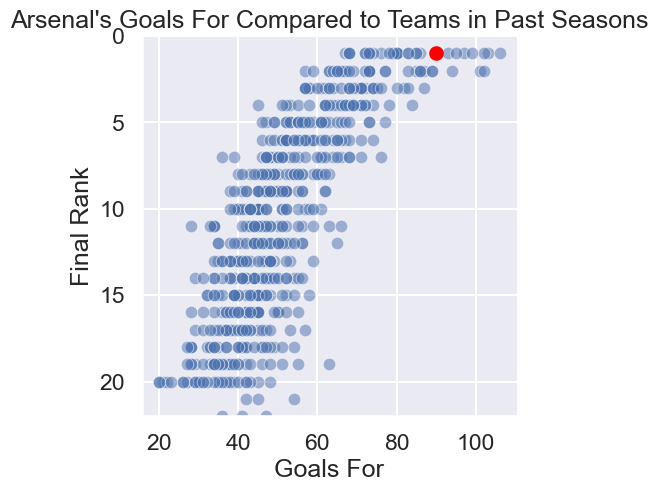

In [4]:
%matplotlib inline
arsenal = standings[standings['Season_End_Year']==2023]
plot = sns.relplot(x='GF', y='Rk', data=standings, alpha=0.5)
ax = plot.ax
ax.scatter(x=90, y=1, marker='o', color='red')
plot.axes[0, 0].set_ylim(max(standings["Rk"]), 0)
plot.set(title = 'Arsenal\'s Goals For Compared to Teams in Past Seasons', xlabel = 'Goals For', ylabel = 'Final Rank')

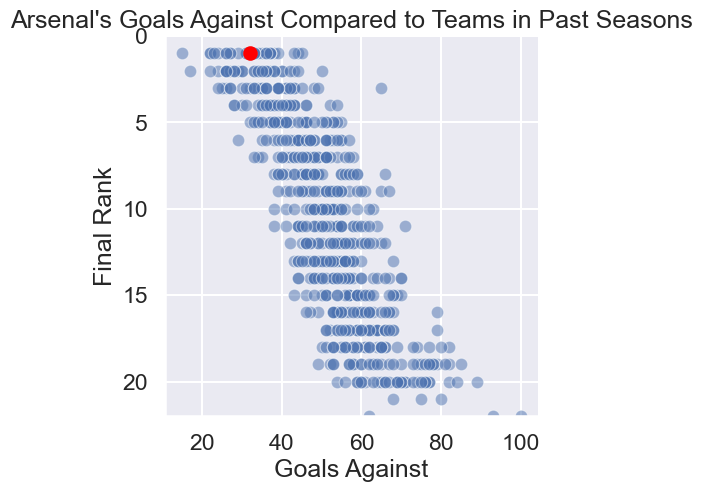

In [5]:
%matplotlib inline
arsenal = standings[standings['Season_End_Year']==2023]
plot = sns.relplot(x='GA', y='Rk', data=standings, alpha=0.5)
ax = plot.ax
ax.scatter(x=32, y=1, marker='o', color='red')
plot.axes[0, 0].set_ylim(max(standings["Rk"]), 0)
plot.set(title = 'Arsenal\'s Goals Against Compared to Teams in Past Seasons', xlabel = 'Goals Against', ylabel = 'Final Rank')

/var/folders/3d/82w22v19393f7w9_4grmfh140000gn/T/ipykernel_1299/2178316387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_winners_ppg.loc[len(pl_winners_ppg.index)] = [arsenal_ppg_mid, "Arsenal Midseason"]


[Text(0.5, 0, 'PPG of winner'), Text(0, 0.5, 'Season')]

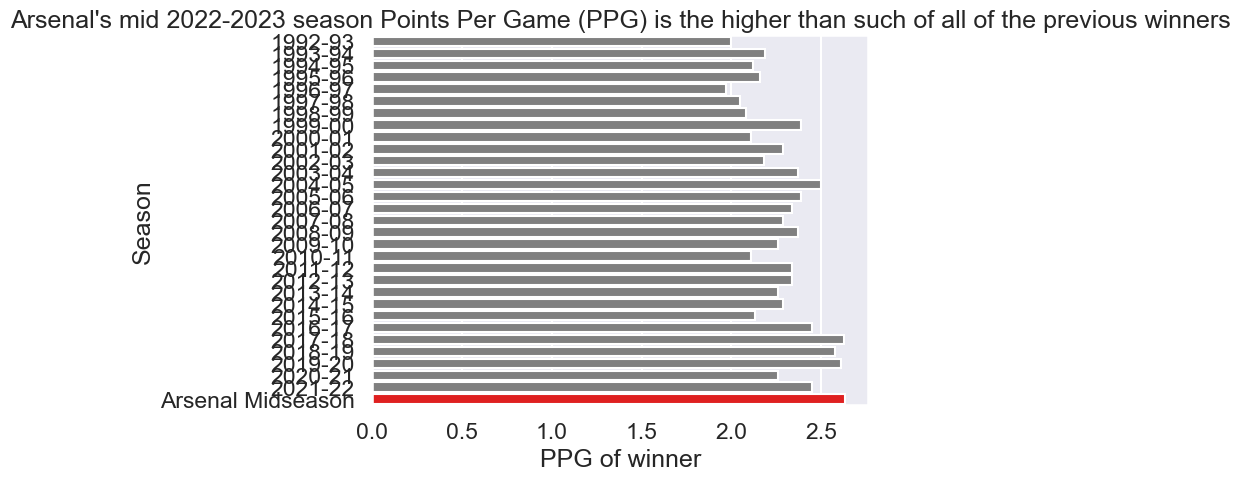

In [6]:
arsenal_ppg_mid = 50/19
pl_winners_ppg = pl_winners[["PPG", "Season"]]
pl_winners_ppg.loc[len(pl_winners_ppg.index)] = [arsenal_ppg_mid, "Arsenal Midseason"] 
fig_1 = sns.barplot(data = pl_winners_ppg, y = "Season", x = "PPG", palette=["red" if x=='Arsenal Midseason' else 'grey' for x in pl_winners_ppg["Season"]])
fig_1.set(title="Arsenal's mid 2022-2023 season Points Per Game (PPG) is the higher than such of all of the previous winners")
fig_1.set(xlabel = "PPG of winner", ylabel = "Season")


In [7]:
num_bootstrap = 10000
sample_ppg = pl_winners["PPG"]
bootstrap_ppg = np.random.choice(sample_ppg, size = (num_bootstrap, len(sample_ppg)), replace = True)
sampling_ppg_means = pd.DataFrame({"ppg": np.mean(bootstrap_ppg, axis = 1)})
sampling_ppg_means.head()

,ppg
0,2.297333
1,2.268000
2,2.309000
3,2.336333
4,2.254333


In [8]:
bootstrap_ci_lower = np.percentile(sampling_ppg_means, 2.5)
bootstrap_ci_upper = np.percentile(sampling_ppg_means, 97.5)
print("Bootstrapper 95% confidence interval:", (bootstrap_ci_lower, bootstrap_ci_upper))

Bootstrapper 95% confidence interval: (2.2223333333333333, 2.344666666666667)


In [9]:
arsenal_standings = standings[standings["Team"] == "Arsenal"]
arsenal_standings["PPG"] = arsenal_standings["Pts"] / arsenal_standings["MP"]

/var/folders/3d/82w22v19393f7w9_4grmfh140000gn/T/ipykernel_1299/2983313036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_standings["PPG"] = arsenal_standings["Pts"] / arsenal_standings["MP"]


In [10]:
arteta_ppg = arsenal_standings.tail(3)["PPG"]
weights = [1/7, 2/7, 4/7]

wa_arteta_ppg = np.average(arteta_ppg, weights = weights)

wa_arteta_ppg

2.2518796992481205

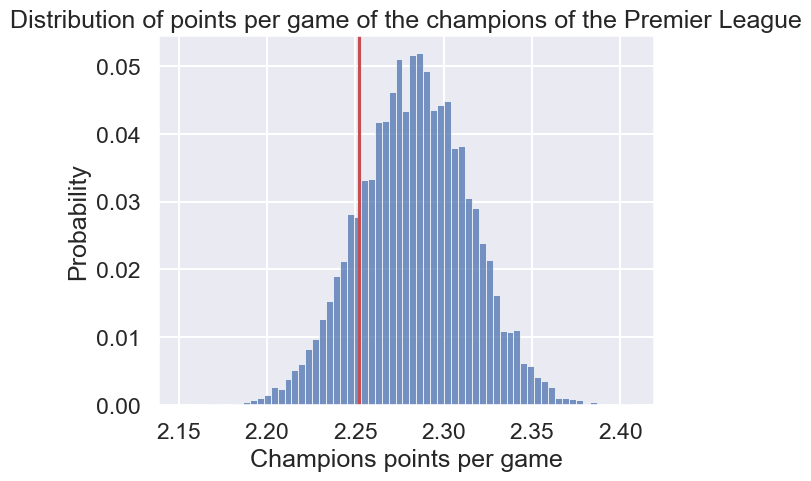

In [11]:
plt.figure()
ppg_plot = sns.histplot(data=sampling_ppg_means, x="ppg", stat="probability")
ppg_plot.axvline(x=wa_arteta_ppg, ymin=0, ymax=1, color='r')
ppg_plot.set(xlabel = "Champions points per game", title = "Distribution of points per game of the champions of the Premier League")
plt.show()

In [12]:
champions = sampling_ppg_means["ppg"] < wa_arteta_ppg
champion_prob = champions.sum()/champions.count()
champion_prob

0.1587

In [13]:
standings[standings.shape[0]-10:standings.shape[0]]

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
597,2022,Manchester City,1,38,29.0,6.0,3.0,99,26,73.0,93,→ Champions League via league finish
598,2022,Manchester Utd,6,38,16.0,10.0,12.0,57,57,0.0,58,→ Europa League via league finish
599,2022,Newcastle Utd,11,38,13.0,10.0,15.0,44,62,-18.0,49,NaN
600,2022,Norwich City,20,38,5.0,7.0,26.0,23,84,-61.0,22,Relegated
601,2022,Southampton,15,38,9.0,13.0,16.0,43,67,-24.0,40,NaN
602,2022,Tottenham,4,38,22.0,5.0,11.0,69,40,29.0,71,→ Champions League via league finish
603,2022,Watford,19,38,6.0,5.0,27.0,34,77,-43.0,23,Relegated
604,2022,West Ham,7,38,16.0,8.0,14.0,60,51,9.0,56,→ Europa Conference League via league finish
605,2022,Wolves,10,38,15.0,6.0,17.0,38,43,-5.0,51,NaN
606,2023,Arsenal,1,38,NaN,NaN,NaN,90,32,NaN,100,NaN
